Small hack to get full-width cells

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Supervised Learning: Regression of Housing Data

Here we'll do a short example of a regression problem: learning a continuous value
from a set of features.

We'll use the simple Boston house prices set, available in scikit-learn.  This
records measurements of 13 attributes of housing markets around Boston, as well
as the median price.  The question is: can you predict the price of a new
market given its attributes?

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)
print(data.target.shape)

(506, 13)
(506,)


We can see that there are just over 500 data points.

The ``DESCR`` variable has a long description of the dataset:

In [3]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

It often helps to quickly visualize pieces of the data using histograms, scatter plots,
or other plot types.  Here we'll load pylab and show a histogram of the target values:
the median price in each neighborhood.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

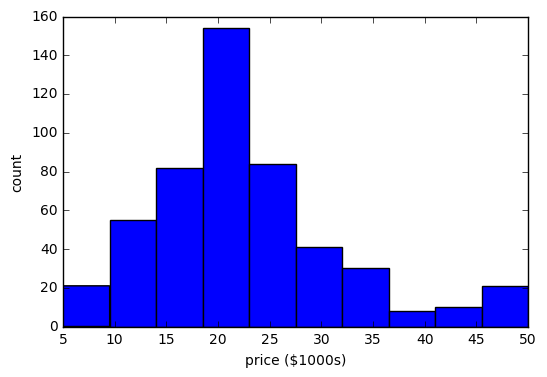

In [5]:
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')

Let's have a quick look to see if some features are more relevant than others for our problem

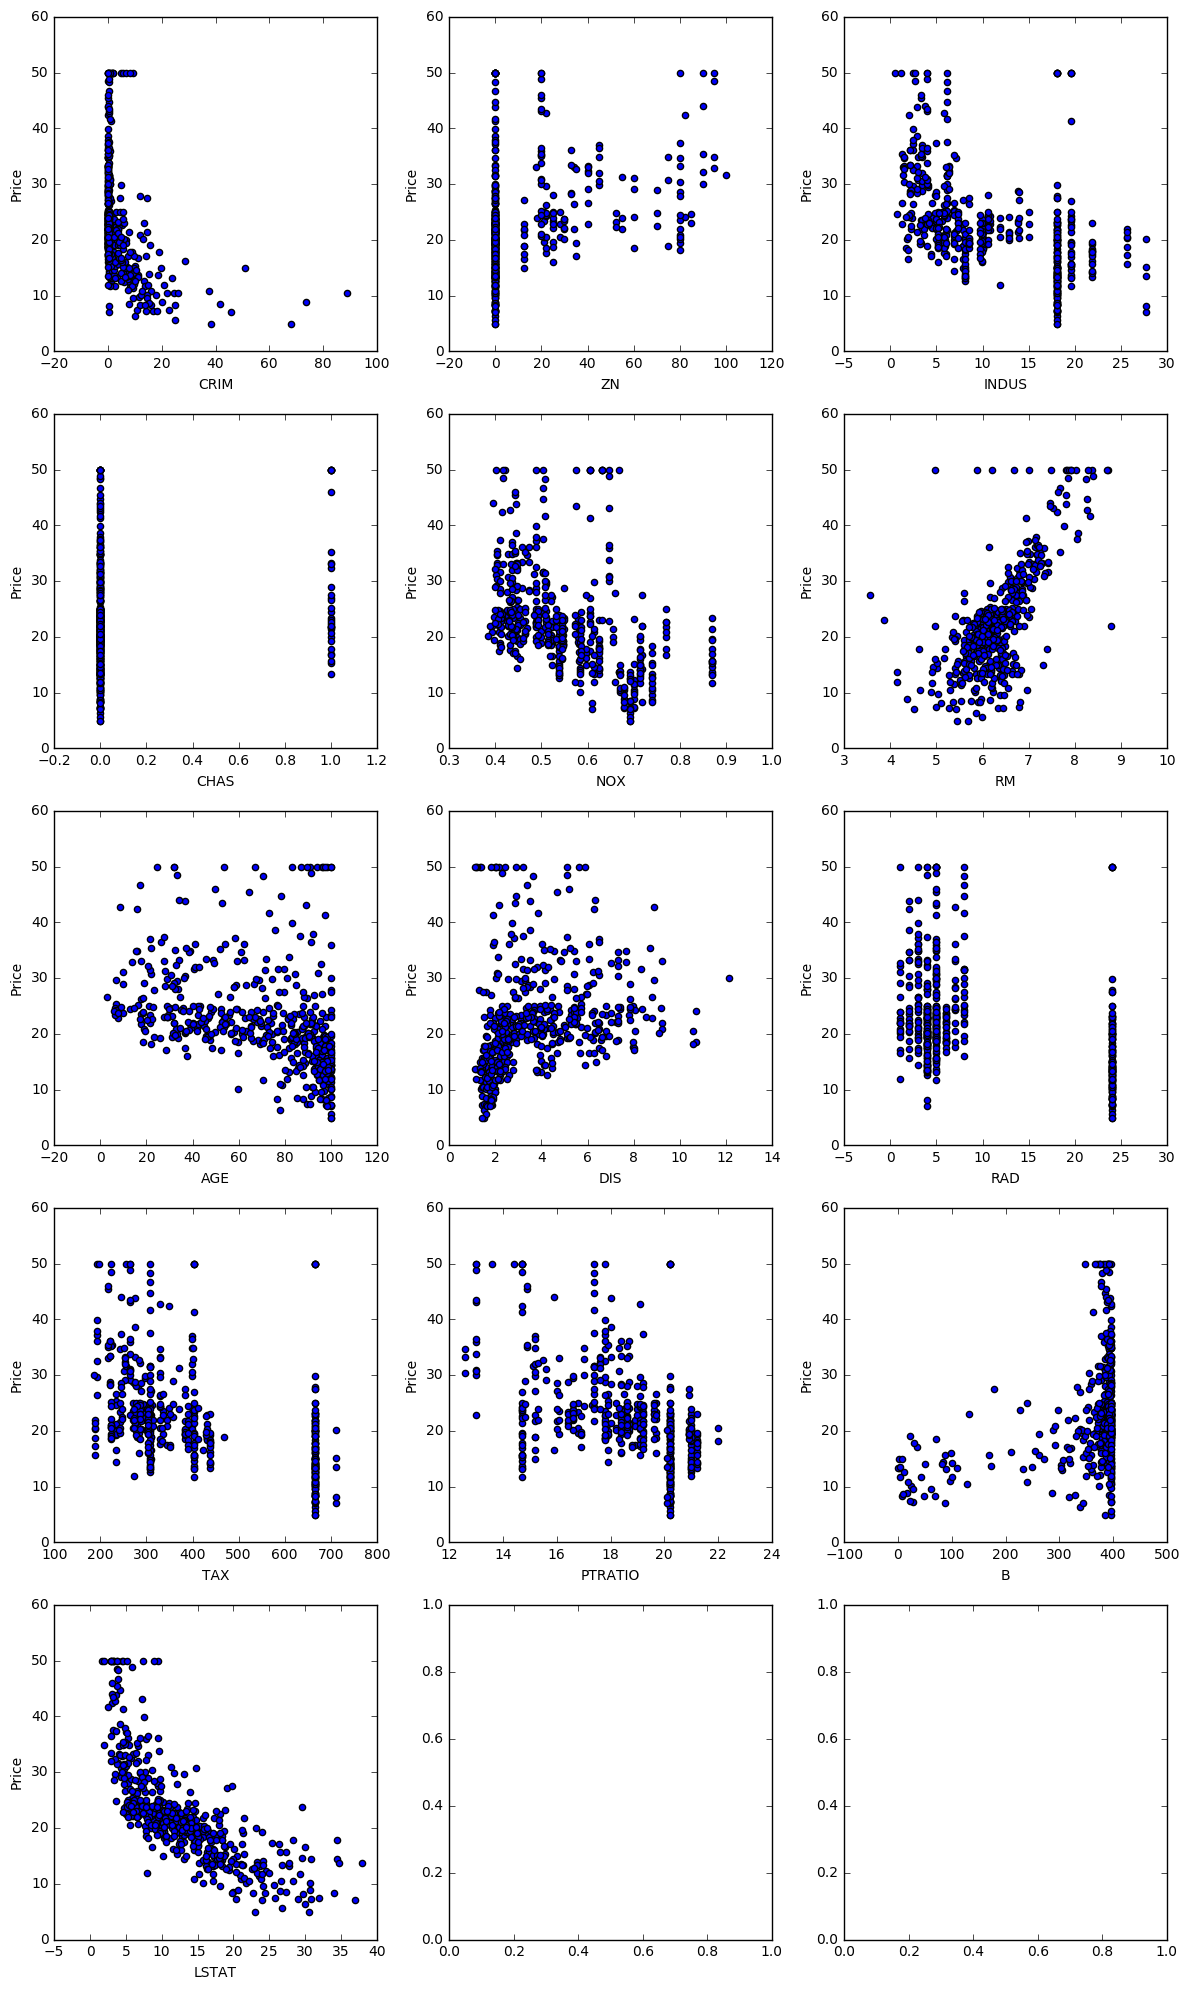

In [6]:
fig, axes = plt.subplots(5, 3, figsize=(12, 20))
axes = axes.ravel()

for index, feature_name in enumerate(data.feature_names):
    ax = axes[index]
    ax.scatter(data.data[:, index], data.target)
    ax.set_ylabel('Price')
    ax.set_xlabel(feature_name)

fig.tight_layout()

This is a manual version of a technique called **feature selection**.

Sometimes, in Machine Learning it is useful to use 
feature selection to decide which features are most useful for a
particular problem.  Automated methods exist which quantify this sort
of exercise of choosing the most informative features.

## Predicting Home Prices: a Simple Linear Regression

Now we'll use ``scikit-learn`` to perform a simple linear regression
on the housing data.  There are many possibilities of regressors to
use. A particularly simple one is ``LinearRegression``: this is
basically a wrapper around an ordinary least squares calculation.

We'll set it up like this:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [8]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
predicted = clf.predict(X_test)
expected = y_test

RMS: 5.4997552681


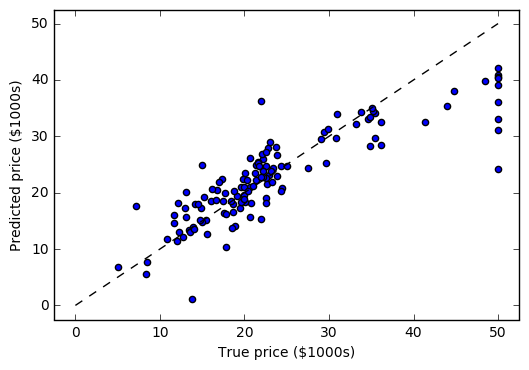

In [10]:
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))

The prediction at least correlates with the true price, though there
are clearly some biases.

## Gradient Boosting Tree Regression

There are many other types of regressors available in scikit-learn:
we'll try a more powerful one here.

RMS: 3.54526423459


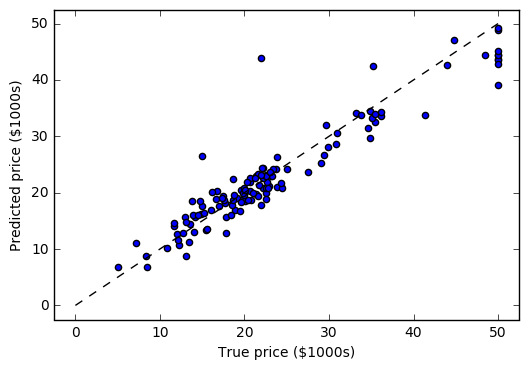

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))

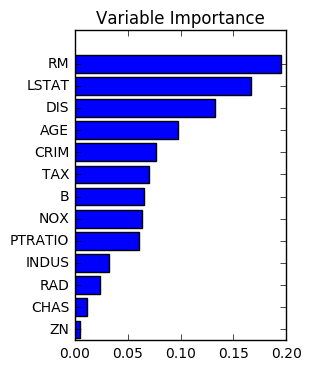

RM         average number of rooms per dwelling
LSTAT      % lower status of the population
DIS        weighted distances to five Boston employment centres
AGE        proportion of owner-occupied units built prior to 1940
CRIM       per capita crime rate by town
TAX        full-value property-tax rate per $10,000
B          1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
NOX        nitric oxides concentration (parts per 10 million)
PTRATIO    pupil-teacher ratio by town
INDUS      proportion of non-retail business acres per town
RAD        index of accessibility to radial highways
CHAS       Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
ZN         proportion of residential land zoned for lots over 25,000 sq.ft.


In [12]:
# Plot feature importance                                                                                                            
feature_importance = clf.feature_importances_                                                                                        
                                                                        
sorted_idx = np.argsort(feature_importance)                                                                                          
pos = np.arange(sorted_idx.shape[0]) + .5                                                                                            
plt.subplot(1, 2, 2)                                                                                                                 
plt.barh(pos, feature_importance[sorted_idx], align='center')                                                                        
plt.yticks(pos, data.feature_names[sorted_idx])                                                                                    
plt.title('Variable Importance')                                                                                                     
plt.show() 

short_name_to_description = {
    'CRIM': 'per capita crime rate by town',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
    'NOX': 'nitric oxides concentration (parts per 10 million)',
    'RM': 'average number of rooms per dwelling',
    'AGE': 'proportion of owner-occupied units built prior to 1940',
    'DIS': 'weighted distances to five Boston employment centres',
    'RAD': 'index of accessibility to radial highways',
    'TAX': 'full-value property-tax rate per $10,000',
    'PTRATIO': 'pupil-teacher ratio by town',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': "Median value of owner-occupied homes in $1000's"}

for feature_name in data.feature_names[sorted_idx][::-1]:
    print('{:<10} {}'.format(feature_name, short_name_to_description[feature_name]))

## Overfitting

Training RMS: 0.0
Test RMS: 4.82544110831


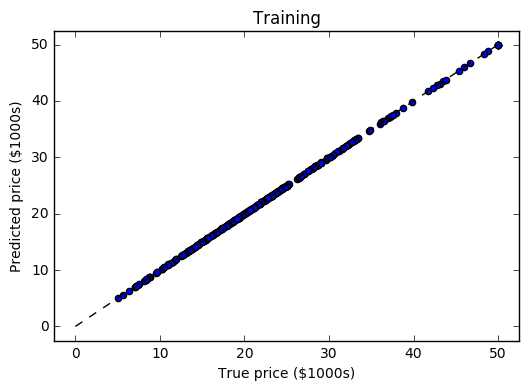

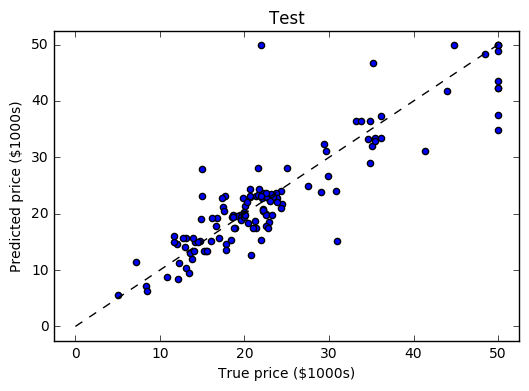

In [13]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

predicted_train = clf.predict(X_train)
expected_train = y_train

predicted_test = clf.predict(X_test)
expected_test = y_test

plt.scatter(expected_train, predicted_train)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title('Training')
print("Training RMS:", np.sqrt(np.mean((predicted_train - expected_train) ** 2)))

plt.figure()
plt.scatter(expected_test, predicted_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title('Test')
print("Test RMS:", np.sqrt(np.mean((predicted_test - expected_test) ** 2)))

RMS: 3.54667911505


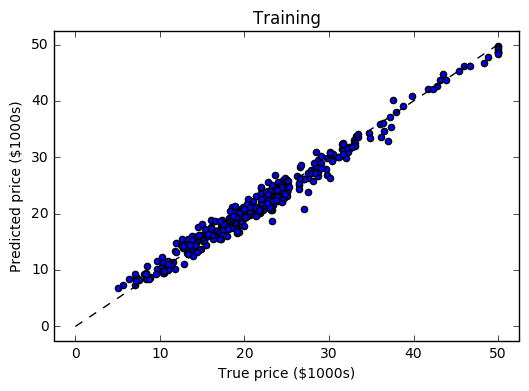

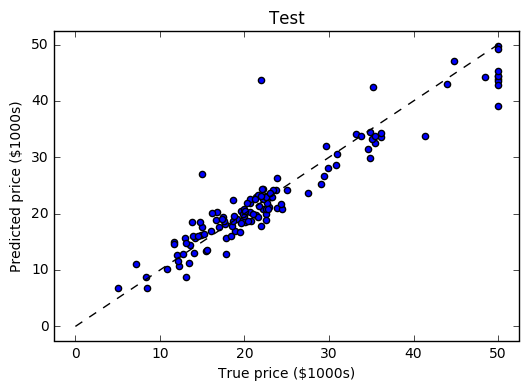

In [14]:
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.scatter(y_train, clf.predict(X_train))
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title('Training')

plt.figure()
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title('Test')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))